In [1]:
import Pkg
Pkg.activate("..")

  Activating project at `~/research/xaqlab/ergm.jl`


In [2]:
using PyCall
py"""
import pickle
import networkx as nx
G = pickle.load(open("/home/will/research/xaqlab/ergm/G_proof_v6.p", "rb"))
"""

In [3]:
py"""
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

layer_names = list(set([G.nodes[n]['layer'] for n in G.nodes]))
layers = {}

for layer in layer_names:
    layers[layer] = G.subgraph([n for n in G.nodes if G.nodes[n]['layer'] == layer])

def p(n):
    return np.array([G.nodes[n]['soma_' + i] for i in 'xyz'])

def subsample(layer, k, s):
    Hs = []
    layer_nodes = [n for n in G.nodes if G.nodes[n]['layer'] == layer]
    m = len(layer_nodes)
    ps = np.vstack([p(n) for n in layer_nodes])
    
    for _ in range(s):
        j0 = npr.randint(m)
        ds = npl.norm(ps - ps[j0, :], axis=1)
        js = np.argpartition(ds, k)[:k]
        ns = [layer_nodes[j] for j in js]
        Hs.append(G.subgraph(ns))
    
    return Hs
"""

In [151]:
using ergm.spaces

function nx_to_digraph(nx)
    A = py"nx.adjacency_matrix($nx).todense()"
    DiGraph(A .> 0)
end

n = 100
layer = "L2/L3"
Gs = map(nx_to_digraph, py"subsample($layer, $n, 10000)");

LoadError: InterruptException:

In [121]:
function desp(G)
    A = G.adjacency
    n = size(A, 1)
    B = A .* (A ^ 2)'
    [sum(B .== m) for m ∈ 1:n-2]
end

function sample_er(n, p)
    DiGraph(convert(Matrix{Bool}, rand(Float64, (n, n)) .< p))
end

sample_er (generic function with 1 method)

In [ ]:
s = 

In [138]:
Gs_ER = [sample_er(30, 0.4) for _ ∈ 1:10000]
s_er = hcat([desp(G) for G ∈ Gs_ER]...);

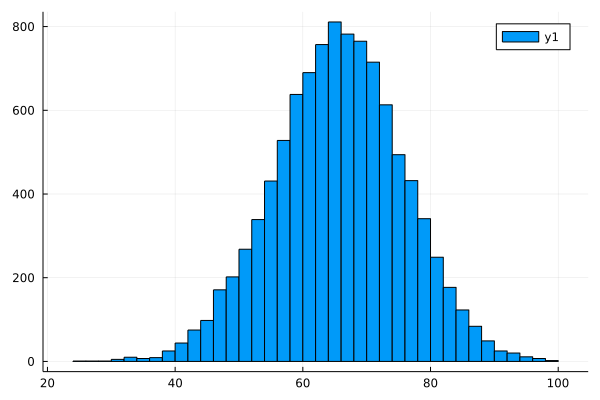

In [150]:
using Plots
histogram(s_er[5, :])